# Introdução
Olá, vamos iniciar o tutorial de Machine Learning! Nesse exemplo usaremos o `dataset` titanic, aonde queremos saber qual passageiro sobreviveu ao acidente está separado em dois arquivos:
- `train.csv` que utilizaremos para fazer o treinamento do nosso algorítmo de classificação.
- `test.csv` que são os dados usados para fazer a previsão e fazer a submissão no kaggle.

Lembrando que nesse repositório não focaremos na competição do Kaggle em si, e sim no tratamento dos dados até a etapa da aplicação do Algorítmo de Machine Learning.

Boa sorte e bons estudos!



# Tratamento dos Dados

Uma das tarefas mais importantes de um Cientísta de Dados é fazer o tratamento e limpeza dos dados antes de fazer qualquer aplicação ou análise. Dados com erros ou imprecisões podem influenciar negativamente ou arruinar qualquer que seja o objetivo. 


 Importando biblioteca pandas

In [24]:
import pandas as pd

Lendo arquivos csv para fazer um tratamento conjunto

In [25]:
treino = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')

dataset = [treino, teste]

Visualizando os dados

In [26]:
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Iniciando tratamento individual

Agora que já visualizamos os dados, vamos começar a verificar coluna por coluna e averiguar se precisam de alguma correção.

### Pclass
Não precisa de mudanças.

In [29]:
treino.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### SibSp e Parch
As colunas SibSp e Parch se referem aos membros da família, com esses dados dá para criar 2 novas colunas que vão dar mais informações importantes.

- `TamanhoFamilia` somando SibSp e Parch.
- `Sosinho` se o tamanho da família for 1 então a pessoa está sozinha.

É importante criar esses dados, pois eles não estão explícitos no código, mas pode gerar resultados melhores se adicionarmos.

In [30]:
treino['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [31]:
treino['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

Criando coluna `TamanhoFamilia`

In [32]:
for data in dataset:
  data['TamanhoFamilia'] = data['SibSp'] + data['Parch'] + 1

treino['TamanhoFamilia'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: TamanhoFamilia, dtype: int64

Criando coluna `Sozinho`

In [33]:
for data in dataset:
  data['Sozinho'] = 0
  data.loc[data['TamanhoFamilia'] == 1, 'Sozinho'] = 1

treino['Sozinho'].value_counts()

1    537
0    354
Name: Sozinho, dtype: int64

### Embarked
Em Embarked vamos substituir os valores NaN (Não informados) pela moda `S`

In [34]:
treino['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [35]:
for data in dataset:
  data['Embarked'].fillna('S', inplace= True)

### Fare
Em Fare vamos substituir os valores NaN pela mediana.

In [36]:
treino['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [37]:
for data in dataset:
  data['Fare'].fillna(data['Fare'].median(), inplace= True)

### Age
Em Age (Idade) vamos substituir os valores NaN por valores aleatórios em um range de `idade_média - desvio_padrao` até `idade_media + desvio_padrao`.

Faremos isso para que os valores vazios não influenciem tanto nos resultados dos nossos modelos.

In [38]:
import numpy as np

for data in dataset:
  age_media = data['Age'].mean()
  age_desv_padrao = data['Age'].std()
  age_nulos = data['Age'].isnull().sum()

  age_lista_aleatoria = np.random.randint(age_media - age_desv_padrao, age_media + age_desv_padrao, size= age_nulos)

  data['Age'][np.isnan(data['Age'])] = age_lista_aleatoria

<ipython-input-38-bcaa1c4fa732>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'][np.isnan(data['Age'])] = age_lista_aleatoria


### Name
Em Nome daria para criar uma coluna extra com os tratamentos usados para as pessoas. Porém nesse tutorial vou eliminar a coluna Name pois requer a biblioteca `re` e não está nos pré requisitos do tutorial.

In [39]:
treino['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

## Transformando dados categóricos em Numéricos
Para utilizar os algorítmos de machine Learning precisamos passar os dados categóricos para numéricos, pois os algoritmos de classificação lidam com números.

In [40]:
for data in dataset:
  #Sex
  data['Sex'] = data['Sex'].map({'female' : 0, 'male' : 1}).astype(int)

  #Embarked
  data['Embarked'] = data['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2}).astype(int)

  # Os dados de Fare já são numéricos, mas vamos separalos em grupos de 4 partes
  data.loc[data['Fare'] <= 7.91, 'Fare']                              = 0
  data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare']  = 1
  data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']    = 2
  data.loc[data['Fare'] > 31, 'Fare']                                 = 3

  # Os dados de idade já são numéricos, mas vamos dividir em idades de intervalos de 16 anos
  data.loc[ data['Age'] <= 16, 'Age'] 					            = 0
  data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
  data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
  data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
  data.loc[ data['Age'] > 64, 'Age']    

Vamos dropar (eliminar) colunas que não vão agregar à análise, e também colunas que não apresentam dados suficientes, tipo Ticket e Cabin, que tem valores NaN demais.

In [41]:
elementos_dropados = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']

for data in dataset:
  data.drop(columns= elementos_dropados, inplace= True)

Agora pra finalizar, vamos transformar os dados de treino e teste em listas

In [42]:
treino = treino.values
teste = teste.values

# Classificando

Agora que os dados estão tratados e limpos, estamos prontos para fazer os treinamentos e classificações.

vamos começar importando os modelos de classificação da biblioteca `sklearn`. Existem uma porção de modelos, porém neste módulo usaremos só os principais, e faremos uma média das precisões para saber qual se sai melhor com esse dataset.

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

classificadores = [
          RandomForestClassifier(100),
          GaussianNB(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(3)
]

Você pode se perguntar, por que importar vários classificadores de treinamento e não só um? 

Porque cada classificador se da melhor com determinado tipo de dataset. Então é melhor testar o máximo possível para ver qual se sai melhor, então no na previsão de teste real só utilizar o melhor.

## Separando treino e teste

Vamos separar aleatoriamente uma porção dos nossos dados para treinar nosso modelo e outra parcela para verificar a precição do nosso modelo.

In [44]:
# função de separação treino e teste
from sklearn.model_selection import train_test_split

# Separando as partes das respostas 'Survived' dos atributos.
X = treino[0::, 1::]
y = treino[0::, 0]

X = X.astype(int)
y = y.astype(int)

Essa parte pode parecer meio confusa, nós vamos criar uma lista para as parcelas de treino e teste, ao invés de fazer só uma separação.

A lista vai conter `rep` (número) valores aleatórios de treino e teste.

Por que fazer isso? 
Quando usamos a função train_test_split, estamos sujeitos a aleatoriedade, que de certa forma tem um pouco de influencia nos resultados finais, então para não correr o risco de cair em uma solução errada, nós tiraremos a média dessas listas aleatórias, diminuindo o fator de aleatoriedade.

In [45]:
X_treino_lista, X_teste_lista, y_treino_lista, y_teste_lista = [], [], [], []

rep = 15
for i in range(rep):
  X_treino, X_teste, y_treino, y_teste = train_test_split(X,
                                                      y,
                                                      random_state= i)
  X_treino_lista.append(X_treino)
  X_teste_lista.append(X_teste)
  y_treino_lista.append(y_treino)
  y_teste_lista.append(y_teste)

Agora faremos um teste de precisão com cada um dos classificadores e tiraremos a média de cada um para saber qual foi o melhor.

In [46]:
# função que mede a precisão
from sklearn.metrics import accuracy_score

precisoes_media = []
nomes_classificadores = []

for clf in classificadores:
  precisao = []
  nomes_classificadores.append(clf.__class__.__name__)
  for i in range(rep):
    #treinamento
    clf.fit(X_treino_lista[i], y_treino_lista[i])
    #previsão
    previsao = clf.predict(X_teste_lista[i])
    #teste de precisão
    precisao.append(accuracy_score(previsao, y_teste_lista[i]))
  precisoes_media.append(np.mean(precisao))

precisoes_media

[0.8017937219730943,
 0.7578475336322871,
 0.7880418535127056,
 0.7739910313901345]

Importando biblioteca `matplotlib` para visualizar graficamente os resultados.

<BarContainer object of 4 artists>

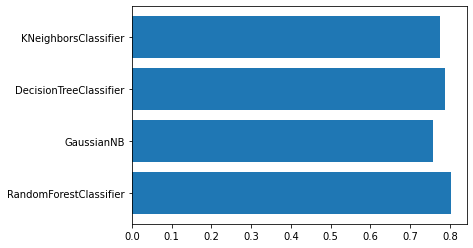

In [47]:
import matplotlib.pyplot as plt

plt.barh(nomes_classificadores, precisoes_media)

A partir dos resultados, se olharmos as ordens das precisões, o calssificador que se saiu melhor foi o `RandomForestClassifier` com `0.8017937219730941` o que equivale a 80% de acerto.